In [1]:
import xarray as xr
import xesmf as xe
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import dask
import cftime
import random
import glob
import matplotlib.gridspec as gs
import pint_xarray
import cf_xarray as cfxr
from eofs.xarray import Eof

In [2]:
from dask.distributed import Client, LocalCluster
client = Client()
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33211 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/33211/status,
Dashboard: /proxy/33211/status,Workers: 7
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44517,Workers: 7
Dashboard: /proxy/33211/status,Total threads: 14
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:40865,Total threads: 2
Dashboard: /proxy/38347/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:39647,


In [3]:
#check daily SST files and are they differnet in diffetent runs?

In [4]:
#No perturb

In [5]:
#load daily sst from scratch?
CP_daily = xr.open_mfdataset("/scratch/e14/sm2435/archive/dd756/history/ocn/ocean_daily*",  use_cftime=True, chunks = {"time":365})

In [23]:
#perturb 1 year resub

In [6]:
CP_daily2 = xr.open_mfdataset("/scratch/e14/sm2435/archive/de760/history/ocn/ocean_daily*",  use_cftime=True, chunks = {"time":30})

In [24]:
#perturb 1 month resub

In [5]:
CP_daily3 = xr.open_mfdataset("/scratch/e14/sm2435/archive/de759/history/ocn/ocean_daily*",  use_cftime=True, chunks = {"time":30})

In [7]:
CP_sst = CP_daily.sst

In [8]:
CP_sst2 = CP_daily2.sst

In [8]:
CP_sst3 = CP_daily3.sst

In [25]:
#difference perturb (1 year resubmit) and unperturb

In [9]:
diff1 = CP_sst2 - CP_sst

In [26]:
#difference perturb (1 month resubmit) and unperturb

In [27]:
diff2 = CP_sst3 - CP_sst

**plot the Jan 31 and Feb 1 for perturbed case (resubmitted every month)**

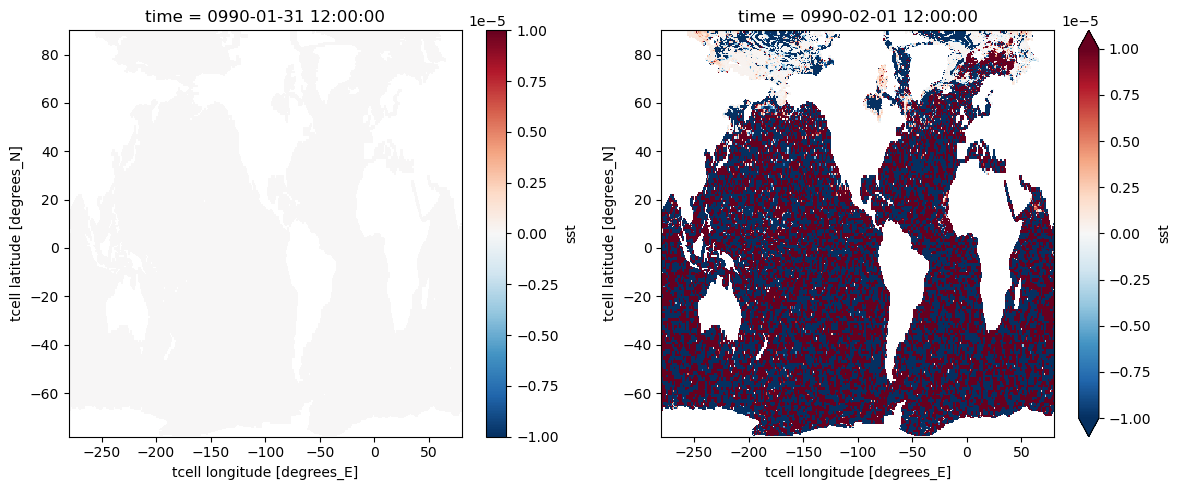

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
diff2[30].plot(ax=axs[0], cmap='RdBu_r', vmin = -0.00001, vmax = 0.00001)

# Plot second subplot
diff2[31].plot(ax=axs[1], cmap='RdBu_r', vmin = -0.00001, vmax = 0.00001)

plt.tight_layout()
plt.show()

**plot the Jan 31 and Feb 1 for perturbed case (resubmitted every YEAR)**

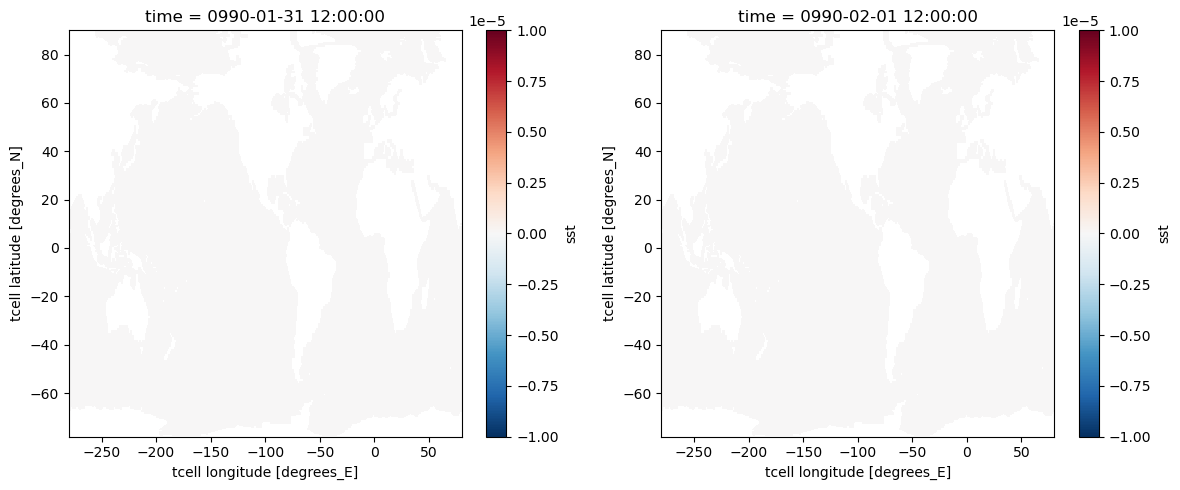

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
diff1[30].plot(ax=axs[0], cmap='RdBu_r', vmin = -0.00001, vmax = 0.00001)

# Plot second subplot
diff1[31].plot(ax=axs[1], cmap='RdBu_r', vmin = -0.00001, vmax = 0.00001)

plt.tight_layout()
plt.show()

**No difference when job resubmission is yearly???????** - these vlaues have been checked at array level and are identical

Now to check atmopshere files

In [34]:
CP_A1 = xr.open_mfdataset("/scratch/e14/sm2435/archive/dd756/history/atm/netCDF/dd756a.pm0990*", use_cftime=True)

In [37]:
CP_A2 = xr.open_mfdataset("/scratch/e14/sm2435/archive/de695/history/atm/netCDF/de695a.pm0990*", use_cftime=True)

In [38]:
CP_A3 = xr.open_mfdataset("/scratch/e14/sm2435/archive/de759/history/atm/netCDF/de759a.pm*", use_cftime=True)

In [ ]:
#load in temp stash code = fld_s00i004

In [42]:
A1_T = CP_A1.fld_s00i004

In [43]:
A2_T = CP_A2.fld_s00i004

In [44]:
A3_T = CP_A3.fld_s00i004

In [46]:
#lets plot the month temp diff

In [47]:
A_diff1 = A2_T - A1_T

In [48]:
A_diff2 = A3_T - A1_T

**plot the Jan  and Feb for perturbed case (resubmitted every YEAR)**

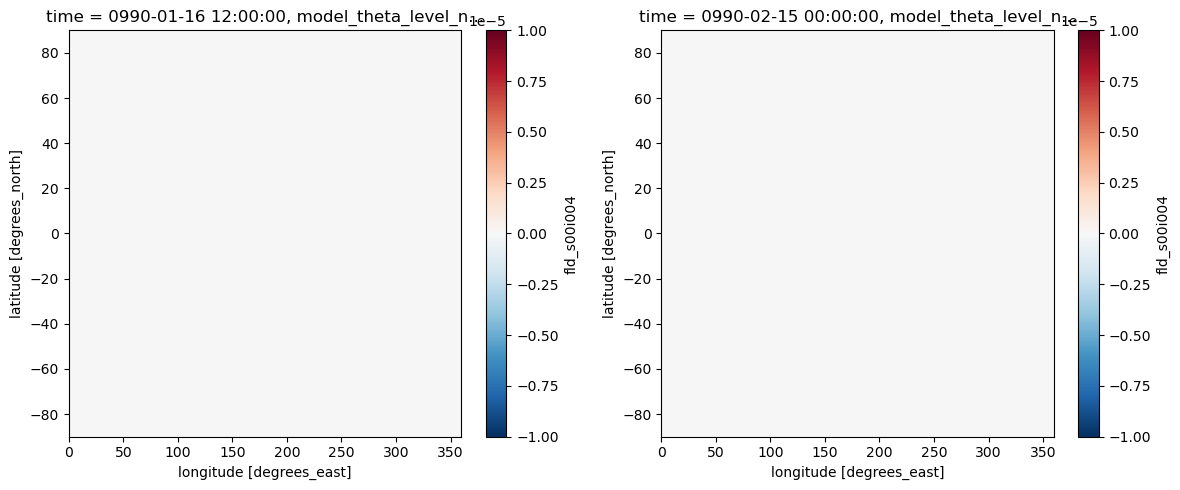

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
A_diff1[0,0].plot(ax=axs[0], cmap='RdBu_r', vmin = -0.00001, vmax = 0.00001)

# Plot second subplot
A_diff1[1,0].plot(ax=axs[1], cmap='RdBu_r', vmin = -0.00001, vmax = 0.00001)

plt.tight_layout()
plt.show()

**plot the Jan 31 and Feb 1 for perturbed case (resubmitted every MONTH)**

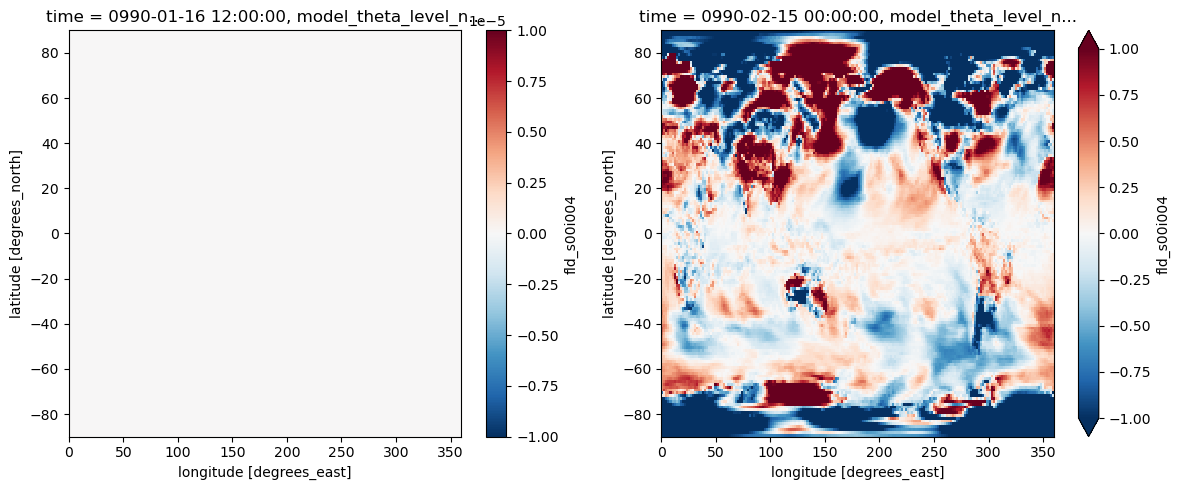

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot first subplot
A_diff2[0,0].plot(ax=axs[0], cmap='RdBu_r', vmin = -0.00001, vmax = 0.00001)

# Plot second subplot
A_diff2[1,0].plot(ax=axs[1], cmap='RdBu_r', vmin = -1, vmax = 1)

plt.tight_layout()
plt.show()

Why is this only chnaging when the coupled job is monthly?????

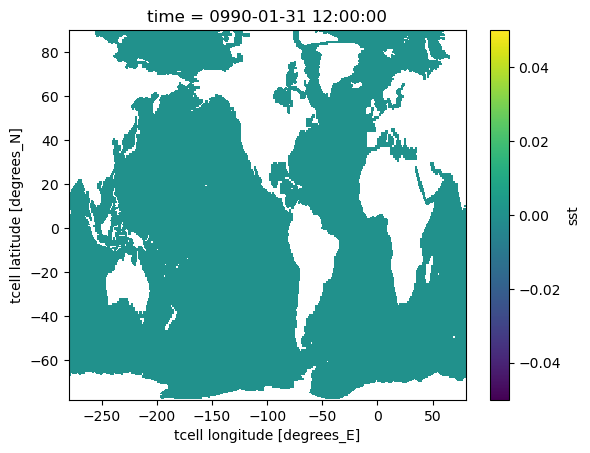

In [89]:
diff_1[30].plot()

In [27]:
ctrl_daily = xr.open_mfdataset("/g/data/hh5/tmp/zg0866/ACCESS-CM2_archive/cm000/history/ocn/ocean_daily*",  use_cftime=True, chunks = {"time":365})

In [28]:
ctrl_sst = ctrl_daily.sst

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter


In [11]:
#ctrl_sst_990 = ctrl_sst.sel(time = slice("0990-01-01", "0990-12-31"))
CP_sst_990 = CP_sst.sel(time = slice("0990-01-01", "0990-12-31"))
CP_sst_9902 = CP_sst2.sel(time = slice("0990-01-01", "0990-12-31"))

In [51]:
CP_sst_990['time'] = ctrl_sst_990.time

In [52]:
CP_sst_9902['time'] = ctrl_sst_990.time

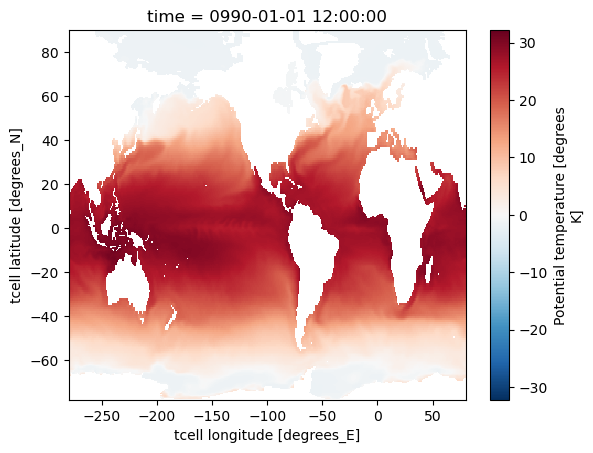

In [12]:
CP_sst_990[0].plot()

In [13]:
diff_ENS = CP_sst_9902 - CP_sst_990

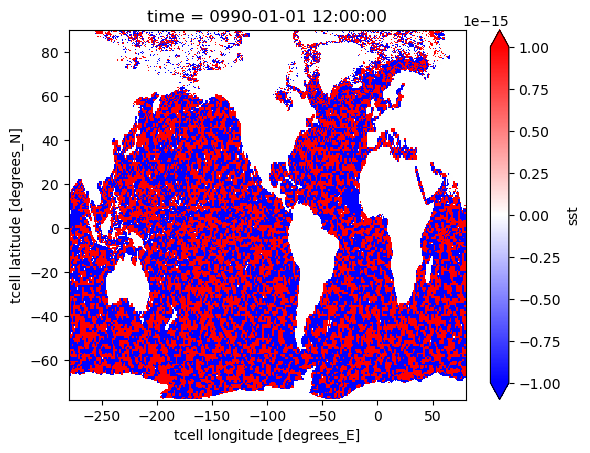

In [15]:
diff_ENS[0].plot(vmin = -1e-15, vmax = 1e-15, cmap = "bwr")

In [17]:
diff_s = diff_ENS

In [ ]:
diff_s

In [18]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6,4)
cbar = None
def animate(i):
    global cbar
    #clear axes and cbar if there is an old one
    ax.clear()
    if cbar:
        cbar.remove()
    # Get the point from the points list at index i
    diff0 = diff_s[i]
    # Plot that point using the x and y coordinates
    im = ax.pcolormesh(diff0.xt_ocean, diff0.yt_ocean, diff0, cmap = "RdBu_r", vmin = -1, vmax = 1)
    ax.set_title(diff_s.time.values[i].strftime())
    cbar = fig.colorbar(im)
ani = FuncAnimation(fig, animate, frames=len(diff_s),
                    interval=500, repeat=False)
plt.close()

In [20]:
# Save the animation as an animated GIF
ani.save("P1minusP2_slow.gif", dpi=300,
         writer=PillowWriter(fps=12))

In [71]:
abs(diff_s[0]).max().values

array(0.16290474, dtype=float32)

In [72]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6,4)
cbar = None
def animate(i):
    global cbar
    #clear axes and cbar if there is an old one
    ax.clear()
    if cbar:
        cbar.remove()
    # Get the point from the points list at index i
    diff0 = diff_s[i]
    # Plot that point using the x and y coordinates
    im = ax.pcolormesh(diff0.xt_ocean, diff0.yt_ocean, diff0, cmap = "RdBu_r", vmin = -1*abs(diff0).max().values, vmax = abs(diff0).max().values)
    ax.set_title(diff_s.time.values[i].strftime())
    cbar = fig.colorbar(im)
ani = FuncAnimation(fig, animate, frames=len(diff_s),
                    interval=500, repeat=False)
plt.close()

In [73]:
# Save the animation as an animated GIF
ani.save("ctrlminuspace_cbar.gif", dpi=300,
         writer=PillowWriter(fps=24))

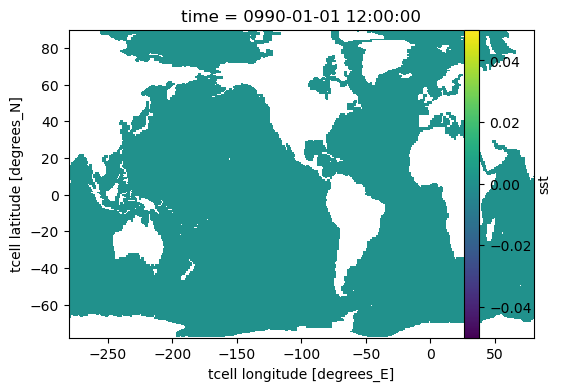

In [71]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6,4)
diff[0].plot(ax = ax)
if ax.collections:
    cbar = plt.colorbar(ax.collections[0], ax=ax)
    cbar.remove()
#ax.clear()
#cbar = plt.colorbar(ax.collections[0], ax=ax)
#diff[1].plot(ax = ax)

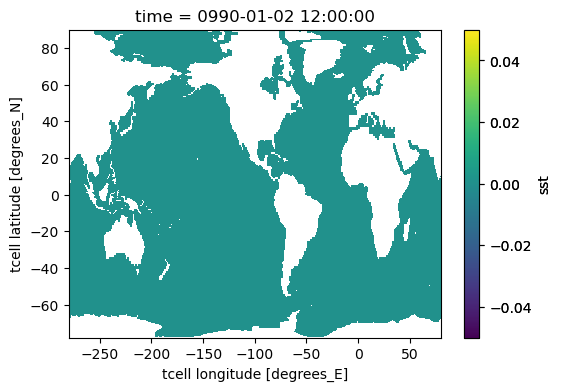

In [66]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6,4)
diff[0].plot(ax = ax)
if ax.collections:
    cbar = plt.colorbar(ax.collections[0], ax=ax)
    cbar.remove()
ax.clear()
diff[1].plot(ax = ax)


In [35]:
np.nanmax(abs(diff[0]).values)

0.16290474

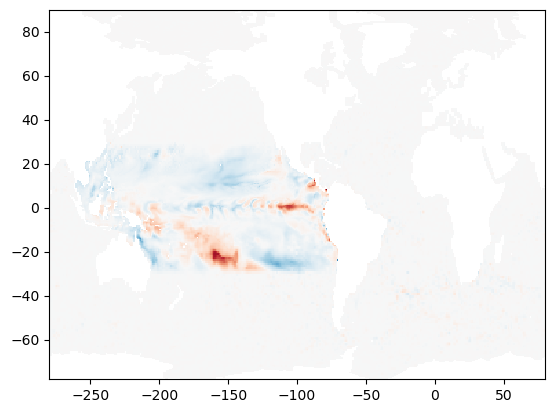

In [36]:
plt.pcolormesh(diff[0].xt_ocean, diff[0].yt_ocean, diff[0], cmap = "RdBu_r", vmin = -1*np.nanmax(abs(diff[0]).values), vmax = np.nanmax(abs(diff[0]).values))

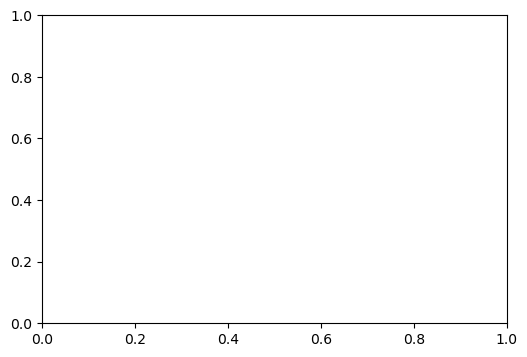

In [39]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6,4)
# Get the point from the points list at index i
# Plot that point using the x and y coordinates
im = ax.pcolormesh(diff.xt_ocean, diff.yt_ocean, diff[0], cmap = "RdBu_r", vmin = -1*np.nanmax(abs(diff[0]).values), vmax = np.nanmax(abs(diff[0]).values))
ax.set_title(diff_s.time.values[0].strftime())
cbar = fig.colorbar(im)
ax.clear()
cbar.remove()

In [55]:
STREAMS=['d','m','7','8']

In [58]:

import os, datetime, collections,  shutil, re, f90nml
from pathlib import Path
from dateutil import rrule
from collections.abc import Sequence


In [64]:
stream_step={}
stream_unit={}

In [65]:
stream_unit['m'] = rrule.MONTHLY
stream_step['m'] = 1


In [ ]:
start_date = datetime.datetime.strptime(CYLC_TASK_CYCLE_POINT[:8], '%Y%m%d')
next_date = datetime.datetime.strptime(NEXT_CYCLE[:8], '%Y%m%d')
end_date = next_date - datetime.timedelta(seconds=1)


In [66]:
for stream in STREAMS:

    if not stream.isalnum():
        # Skip spaces, commas etc
        continue
    # Loop over time
    print(f'stream: {stream}')
    if stream not in stream_unit:
        print(f"Warning: requested stream {stream} not found in model namelist")
        continue
    for date in rrule.rrule(stream_unit[stream], interval=stream_step[stream],
                            dtstart=start_date, until=end_date):
        print(date)




stream: d
stream: m


NameError: name 'start_date' is not defined

In [3]:
d7 = xr.open_dataset("/scratch/e14/sm2435/ENSO_exps/dd756//history/ocn/ocean_month.nc-09901231", use_cftime = True)

In [4]:
d6 = xr.open_mfdataset("/scratch/e14/sm2435/ENSO_exps/de614//history/ocn/ocean_month.nc-0990*", use_cftime = True, chunks = {"time":3})

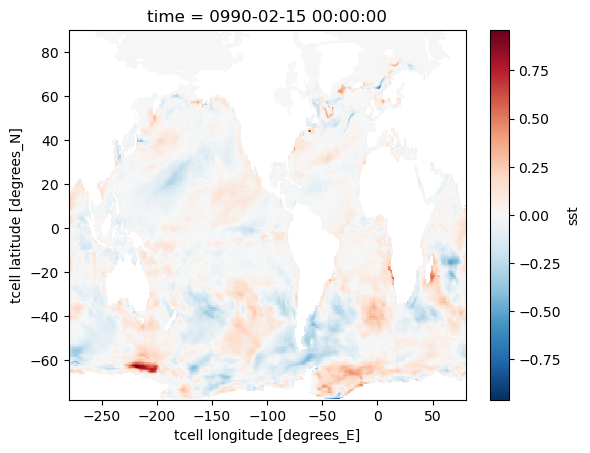

In [5]:
(d6.sst[1] - d7.sst[1]).plot()

In [3]:
dd756 = xr.open_mfdataset("/scratch/e14/sm2435/ENSO_exps/dd756/history/atm/netCDF/dd756a.pm099006_mon.nc")

OSError: [Errno -101] NetCDF: HDF error: b'/scratch/e14/sm2435/ENSO_exps/dd756/history/atm/netCDF/dd756a.pm099006_mon.nc'

In [17]:
de614 = xr.open_mfdataset("/scratch/e14/sm2435/archive/de614/history/atm/netCDF/de614a.pm0990*.nc")

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/coding/times.py:710: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/coding/times.py:710: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, cal

In [9]:
de614

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    history:      File /scratch/e14/sm2435/archive/de614/history/atm/de614a.p...
    Conventions:  CF-1.6

In [16]:
dd756 = xr.open_mfdataset("/scratch/e14/sm2435/archive/dd756/history/atm/netCDF/dd756a.pm0990*.nc")

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/coding/times.py:710: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/xarray/coding/times.py:710: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, cal

In [11]:
dd756

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    history:      File /scratch/e14/sm2435/archive/dd756/history/atm/dd756a.p...
    Conventions:  CF-1.6

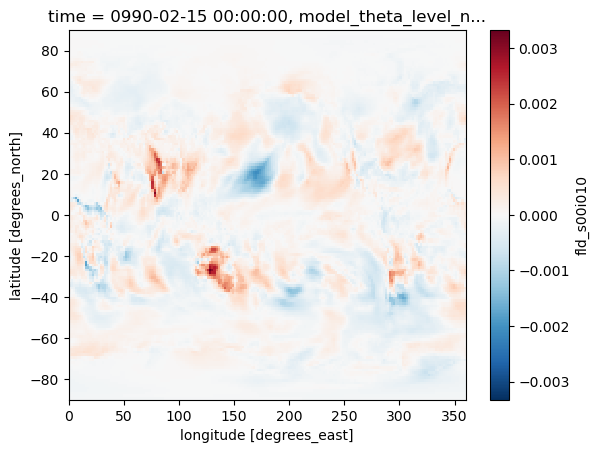

In [18]:
(de614.fld_s00i010[1,1] - dd756.fld_s00i010[1,1]).plot()

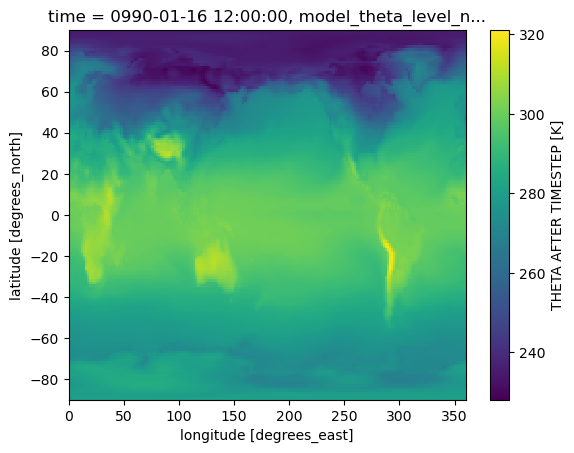

In [92]:
dd756.fld_s00i004[0,0].plot()